In [1]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [3]:
meta = pd.read_excel("../articoli_testo_new_3.xlsx", encoding="utf8", error_bad_lines=False)
meta = meta.replace(np.nan, '', regex=True)

In [4]:
article_id = meta['ID']
len(article_id)

262

In [5]:
meta['Trend 1'][0]

'Cobots and Human Hybridization'

In [6]:
tech1 = []
for i in meta['Trend 1']:
    tech1.append(i)

tech2 = []
for i in meta['Trend 2']:
    tech2.append(i)
    
tech3 = []
for i in meta['Trend 3']:
    tech3.append(i)

In [7]:
Tech = []
for i in range(len(article_id)):
    l = []
    if len(tech1[i]): l.append(tech1[i])
    #if len(tech2[i]): l.append(tech2[i])
    #if len(tech3[i]): l.append(tech3[i])
        
    #Tech.append(list(l))
    Tech.append(', '.join(map(str, list(l)))) 
    
Tech[0]

'Cobots and Human Hybridization'

In [8]:
len(article_id)

262

In [9]:
# Create Tech Dataframe
tech = pd.DataFrame({'ID': article_id, 'Tech': Tech})
tech.head()

ID                            Tech
0  c812e0a3418d624ae60df3ec9e19d184  Cobots and Human Hybridization
1  0e2ef6bd7619374e0531d1551ab2141e  Privacy and Security by design
2  8602d8791a1754506303dcfd9a7b79e3        Security & Cyber Warfare
3  2157ac6d12e063b6a38c5c0491e0b322        Workforce Transformation
4  89390733d3f9e1f30bae53de5e2d8a04       New Normal after COVID-19

In [10]:
tech.describe()

ID                       Tech
count                                262                        262
unique                               260                         30
top     254788edc7fc8f3f71263dcf339de972  New Normal after COVID-19
freq                                   2                         27

In [11]:
articoli = meta[['ID','Titolo','Abstract', 'Testo']]
articoli = pd.merge(articoli, tech, on = 'ID')

In [12]:
articoli.head()

ID  \
0  c812e0a3418d624ae60df3ec9e19d184   
1  0e2ef6bd7619374e0531d1551ab2141e   
2  8602d8791a1754506303dcfd9a7b79e3   
3  2157ac6d12e063b6a38c5c0491e0b322   
4  89390733d3f9e1f30bae53de5e2d8a04   

                                                        Titolo Abstract  \
0           "Pandemic drone" could spot those who are infected            
1         2020 census data may not be as anonymous as expected            
2  3 common pandemic scams highlighted by domain name analysis            
3   3 Questions: The rapidly unfolding future of smart fabrics            
4        4 types of robots playing vital roles during COVID-19            

                                                                                                                                                                                                                                                                                                         Testo  \
0  Spotted: In the current climate, one of the major problems in controlling a pandemic such as COVID-19 is not knowing who is infected and how widespread the disease is in your area. The University of South Australia and Canada-based drone technology specialist, Draganfly Inc., have teamed up to d...   
1  It's census time in the US once again and multiple ads are running on both online and offline media to encourage everyone selected for the census to respond. The constitutional goal of the census is to ensure that congressional districts are properly balanced, thereby ensuring adequate represent...   
2  While coronavirus lockdowns may be slowly starting to unwind the attempts to use the pandemic to scam people continues to gain steamAccording to an analysis of coronavirusrelated domain names by cybersecurity firm CujoAI these scams fall into three general categories fake products financial frau...   
3                                                                                                                                                                                                             Soon, your clothes may be able to monitor your vital signs, analyze the results, and warn you of   
4  A perfect storm of disruptions to supply, demand and workplace practices has turned the world of manufacturing and supply chains upside down. Social distancing and isolation are the order of the day, and manual tasks normally undertaken by humans are suddenly out of reach or unsafe. Undertaking ...   

                             Tech  
0  Cobots and Human Hybridization  
1  Privacy and Security by design  
2        Security & Cyber Warfare  
3        Workforce Transformation  
4       New Normal after COVID-19

In [13]:
len(articoli)

266

In [14]:
# remove samples with no tags
articoli['Tech'] = articoli['Tech'].apply(lambda y: '' if len(y)==0 else y)
articoli = articoli[~(articoli['Tech'].str.len() == 0)]
#articoli = articoli[~(articoli['Abstract'].str.len() == 0)]
articoli = articoli[~(articoli['Testo'].str.len() == 0)]

In [15]:
len(articoli)

256

In [16]:
articoli.head()

ID  \
0  c812e0a3418d624ae60df3ec9e19d184   
1  0e2ef6bd7619374e0531d1551ab2141e   
2  8602d8791a1754506303dcfd9a7b79e3   
3  2157ac6d12e063b6a38c5c0491e0b322   
4  89390733d3f9e1f30bae53de5e2d8a04   

                                                        Titolo Abstract  \
0           "Pandemic drone" could spot those who are infected            
1         2020 census data may not be as anonymous as expected            
2  3 common pandemic scams highlighted by domain name analysis            
3   3 Questions: The rapidly unfolding future of smart fabrics            
4        4 types of robots playing vital roles during COVID-19            

                                                                                                                                                                                                                                                                                                         Testo  \
0  Spotted: In the current climate, one of the major problems in controlling a pandemic such as COVID-19 is not knowing who is infected and how widespread the disease is in your area. The University of South Australia and Canada-based drone technology specialist, Draganfly Inc., have teamed up to d...   
1  It's census time in the US once again and multiple ads are running on both online and offline media to encourage everyone selected for the census to respond. The constitutional goal of the census is to ensure that congressional districts are properly balanced, thereby ensuring adequate represent...   
2  While coronavirus lockdowns may be slowly starting to unwind the attempts to use the pandemic to scam people continues to gain steamAccording to an analysis of coronavirusrelated domain names by cybersecurity firm CujoAI these scams fall into three general categories fake products financial frau...   
3                                                                                                                                                                                                             Soon, your clothes may be able to monitor your vital signs, analyze the results, and warn you of   
4  A perfect storm of disruptions to supply, demand and workplace practices has turned the world of manufacturing and supply chains upside down. Social distancing and isolation are the order of the day, and manual tasks normally undertaken by humans are suddenly out of reach or unsafe. Undertaking ...   

                             Tech  
0  Cobots and Human Hybridization  
1  Privacy and Security by design  
2        Security & Cyber Warfare  
3        Workforce Transformation  
4       New Normal after COVID-19

In [17]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text)
    text = re.sub(r'[?|!|\'|"|#]',r'',text)
    text = re.sub(r'[.|,|)|(|\|/]',r' ',text)
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    
    text = text.replace("\n"," ")
    
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [18]:
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: clean_text(x))
articoli['Abstract'] = articoli['Abstract'].apply(lambda x: clean_text(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: clean_text(x))
articoli.head()

ID  \
0  c812e0a3418d624ae60df3ec9e19d184   
1  0e2ef6bd7619374e0531d1551ab2141e   
2  8602d8791a1754506303dcfd9a7b79e3   
3  2157ac6d12e063b6a38c5c0491e0b322   
4  89390733d3f9e1f30bae53de5e2d8a04   

                                                      Titolo Abstract  \
0           pandemic drone could spot those who are infected            
1            census data may not be as anonymous as expected            
2  common pandemic scams highlighted by domain name analysis            
3    questions the rapidly unfolding future of smart fabrics            
4           types of robots playing vital roles during covid            

                                                                                                                                                                                                                                                                                                         Testo  \
0  spotted in the current climate one of the major problems in controlling a pandemic such as covid is not knowing who is infected and how widespread the disease is in your area the university of south australia and canada based drone technology specialist draganfly inc have teamed up to develop a ...   
1  its census time in the us once again and multiple ads are running on both online and offline media to encourage everyone selected for the census to respond the constitutional goal of the census is to ensure that congressional districts are properly balanced thereby ensuring adequate representati...   
2  while coronavirus lockdowns may be slowly starting to unwind the attempts to use the pandemic to scam people continues to gain steamaccording to an analysis of coronavirusrelated domain names by cybersecurity firm cujoai these scams fall into three general categories fake products financial frau...   
3                                                                                                                                                                                                                soon your clothes may be able to monitor your vital signs analyze the results and warn you of   
4  a perfect storm of disruptions to supply demand and workplace practices has turned the world of manufacturing and supply chains upside down social distancing and isolation are the order of the day and manual tasks normally undertaken by humans are suddenly out of reach or unsafe undertaking thes...   

                             Tech  
0  Cobots and Human Hybridization  
1  Privacy and Security by design  
2        Security & Cyber Warfare  
3        Workforce Transformation  
4       New Normal after COVID-19

In [19]:
len(articoli['ID'])

256

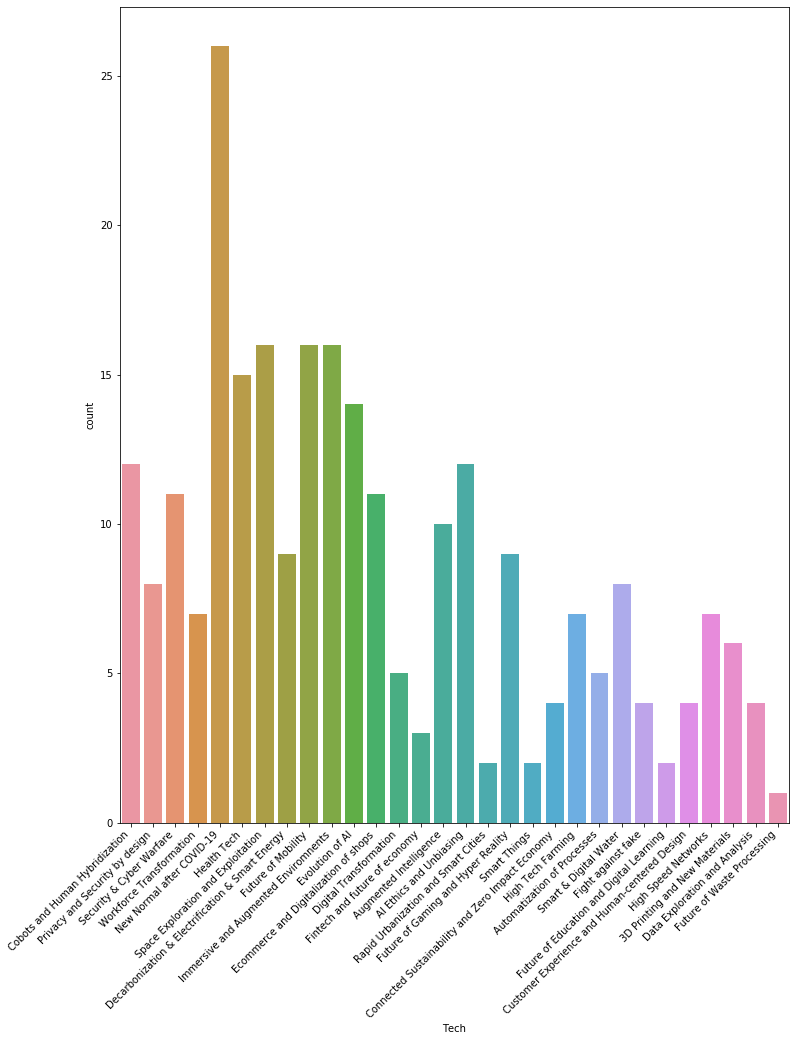

In [20]:
plt.figure(figsize=(12,15))
ax=sns.countplot(articoli["Tech"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In [21]:
len(articoli['Tech'].unique())

30

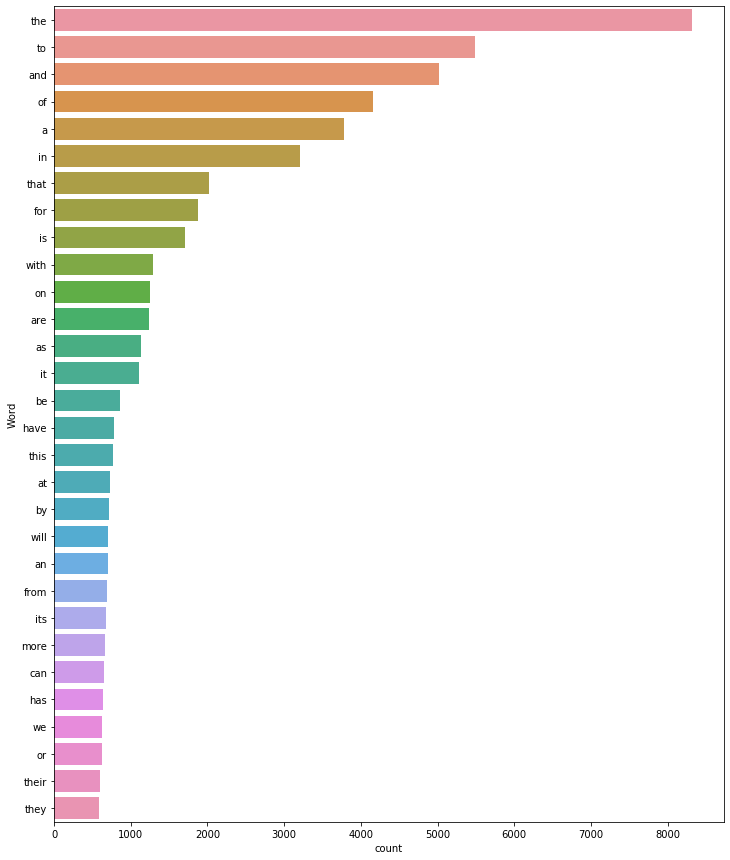

In [22]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(articoli['Testo'], 30)

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\edoardo.esposito\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

articoli['Abstract'] = articoli['Abstract'].apply(lambda x: remove_stopwords(x))
articoli['Titolo'] = articoli['Titolo'].apply(lambda x: remove_stopwords(x))
articoli['Testo'] = articoli['Testo'].apply(lambda x: remove_stopwords(x))

In [25]:
#articoli['Txt'] = articoli['Titolo'] + articoli['Abstract']
articoli['Txt'] = articoli['Titolo'] + articoli['Testo'] + articoli['Abstract']

In [26]:
del(articoli['Abstract'])
del(articoli['Titolo'])
del(articoli['Testo'])

In [27]:
articoli.head()

ID                            Tech  \
0  c812e0a3418d624ae60df3ec9e19d184  Cobots and Human Hybridization   
1  0e2ef6bd7619374e0531d1551ab2141e  Privacy and Security by design   
2  8602d8791a1754506303dcfd9a7b79e3        Security & Cyber Warfare   
3  2157ac6d12e063b6a38c5c0491e0b322        Workforce Transformation   
4  89390733d3f9e1f30bae53de5e2d8a04       New Normal after COVID-19   

                                                                                                                                                                                                                                                                                                           Txt  
0  pandemic drone could spot infectedspotted current climate one major problems controlling pandemic covid knowing infected widespread disease area university south australia canada based drone technology specialist draganfly inc teamed develop pandemic drone technology uses special sensors compute...  
1  census data may anonymous expectedcensus time us multiple ads running online offline media encourage everyone selected census respond constitutional goal census ensure congressional districts properly balanced thereby ensuring adequate representation modern census expanded beyond simple goal all...  
2  common pandemic scams highlighted domain name analysiscoronavirus lockdowns may slowly starting unwind attempts use pandemic scam people continues gain steamaccording analysis coronavirusrelated domain names cybersecurity firm cujoai scams fall three general categories fake products financial fr...  
3                                                                                                                                                                                               questions rapidly unfolding future smart fabricssoon clothes may able monitor vital signs analyze results warn  
4  types robots playing vital roles covidperfect storm disruptions supply demand workplace practices turned world manufacturing supply chains upside social distancing isolation order day manual tasks normally undertaken humans suddenly reach unsafe undertaking tasks without human human contact exac...

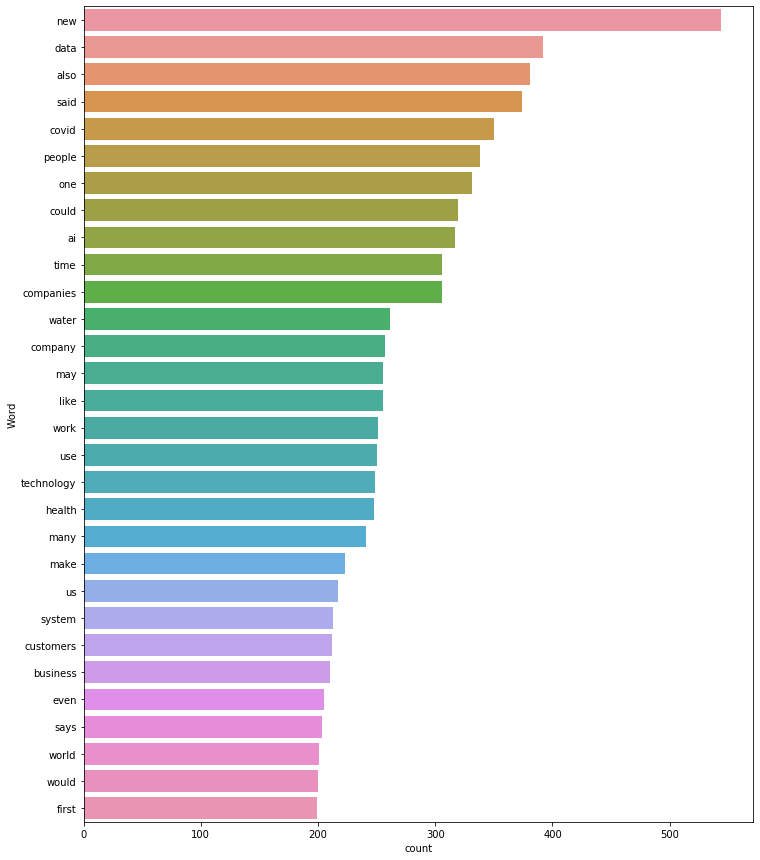

In [28]:
freq_words(articoli['Txt'], 30)

In [29]:
tags = articoli['Tech'].apply(lambda x:len(x.split(',')))

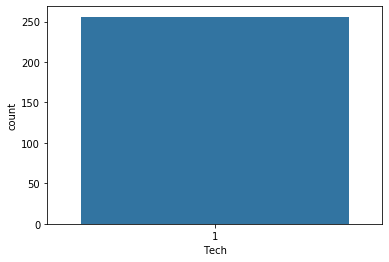

In [30]:
sns.countplot(x=tags)

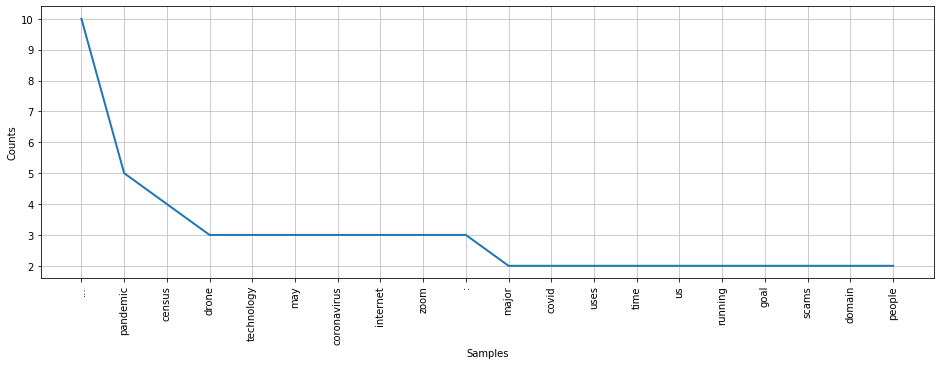

In [31]:
import nltk
from nltk.tokenize import ToktokTokenizer
x=nltk.FreqDist(ToktokTokenizer().tokenize(articoli['Txt']))
plt.figure(figsize=(16,5))
x.plot(20)

<Figure size 432x288 with 0 Axes>

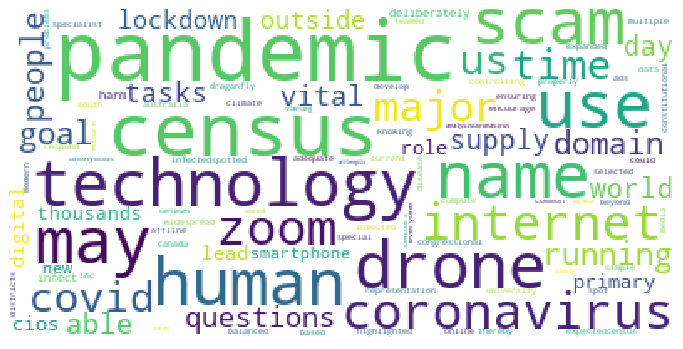

In [73]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(articoli['Txt']))

fig = plt.figure(1)
plt.figure(figsize=(12,15)) 
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [32]:
# https://stackabuse.com/text-classification-with-python-and-scikit-learn/
# INTERESTING FOR SAVING MODEL
from pandas import Series
y = Series(articoli['Tech']).values

# convert text to features
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(articoli['Tech'])

MultiLabelBinarizer(classes=None, sparse_output=False)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = tfidfconverter.fit_transform(articoli['Txt']).toarray()

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [36]:
y_pred = classifier.predict(X_test)

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))

[[0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1]
 [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2 0 0 0 0 0]
 [0 0 3 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 3 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 6 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

In [38]:
print(classification_report(y_test,y_pred))

                                                  precision    recall  f1-score   support

                   3D Printing and New Materials       0.00      0.00      0.00         3
                         AI Ethics and Unbiasing       0.67      0.50      0.57         4
                          Augmented Intelligence       0.00      0.00      0.00         1
                     Automatization of Processes       0.00      0.00      0.00         1
                  Cobots and Human Hybridization       0.50      1.00      0.67         1
Connected Sustainability and Zero Impact Economy       0.00      0.00      0.00         0
Decarbonization & Electrification & Smart Energy       0.00      0.00      0.00         0
                          Digital Transformation       0.00      0.00      0.00         0
           Ecommerce and Digitalization of shops       0.00      0.00      0.00         3
                                 Evolution of AI       0.00      0.00      0.00         5
        F

C:\Users\edoardo.esposito\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\edoardo.esposito\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(accuracy_score(y_test, y_pred))

0.4230769230769231


In [40]:
# https://www.kaggle.com/jbencina/clustering-documents-with-tfidf-and-kmeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE#

In [41]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
tfidf.fit(articoli['Txt'])
text = tfidf.transform(articoli['Txt'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


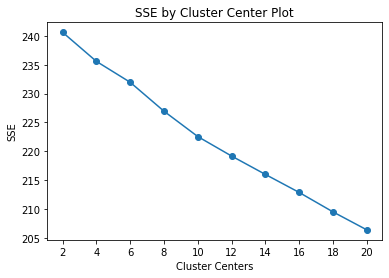

In [42]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(text, 20)

In [43]:
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

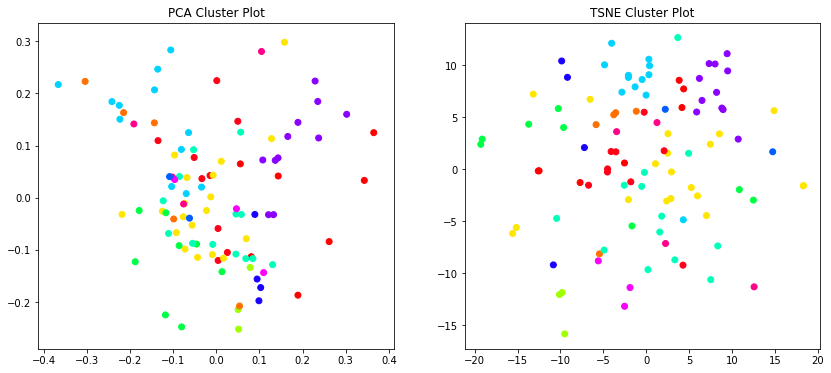

In [44]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=200, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=100, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(text, clusters)
    


In [45]:
features = tfidf.get_feature_names()

In [46]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(text, clusters, features, 3)


Cluster 0
dynamics,robots,robot

Cluster 1
zero,energy,solar

Cluster 2
ai,million,games

Cluster 3
spacecraft,earth,space

Cluster 4
based,intelligence,artificial

Cluster 5
driving,tesla,delivery

Cluster 6
energy,google,innovations

Cluster 7
customers,companies,customer

Cluster 8
video,meeting,zoom

Cluster 9
stars,black,astronomers

Cluster 10
learning,brain,ai

Cluster 11
energy,plants,water

Cluster 12
ai,privacy,data

Cluster 13
health,patients,covid


In [67]:
def get_keywords(txt):
    tokens = nltk.tokenize.word_tokenize(txt)
    keywords = [keyword for keyword in tokens if keyword.isalpha() and not keyword in stop_words]
    keywords_string = ','.join(keywords)
    print (keywords_string)
    return keywords_string

In [68]:
#articoli.apply(get_keywords, axis=1)

In [69]:
get_keywords(articoli['Txt'][0])

pandemic,drone,could,spot,infectedspotted,current,climate,one,major,problems,controlling,pandemic,covid,knowing,infected,widespread,disease,area,university,south,australia,canada,based,drone,technology,specialist,draganfly,inc,teamed,develop,pandemic,drone,technology,uses,special,sensors,computer,vision,detect,infected,respiratory,diseases,remote,sensing,computer,algorithms,practical,ways,detecting,virus,new,drone,works,crowds,could,include,offices,airports,cruise,ships,care,homes,able,monitor,persons,temperature,heart,rate,respiratory,rate,detect,sneezing,coughing,technology,originally,unveiled,team,demonstrated,ability,measure,heart,breathing,rates,analyse,human,movements,detect,coughing,sneezing,distance,metres,drone,within,metres,fixed,cameras,explore,health,wellbeing,innovations,mobility,transport,innovations,rd,april,email,candy,gibson,unisa,edu,auwebsite,unisa,edu,au


'pandemic,drone,could,spot,infectedspotted,current,climate,one,major,problems,controlling,pandemic,covid,knowing,infected,widespread,disease,area,university,south,australia,canada,based,drone,technology,specialist,draganfly,inc,teamed,develop,pandemic,drone,technology,uses,special,sensors,computer,vision,detect,infected,respiratory,diseases,remote,sensing,computer,algorithms,practical,ways,detecting,virus,new,drone,works,crowds,could,include,offices,airports,cruise,ships,care,homes,able,monitor,persons,temperature,heart,rate,respiratory,rate,detect,sneezing,coughing,technology,originally,unveiled,team,demonstrated,ability,measure,heart,breathing,rates,analyse,human,movements,detect,coughing,sneezing,distance,metres,drone,within,metres,fixed,cameras,explore,health,wellbeing,innovations,mobility,transport,innovations,rd,april,email,candy,gibson,unisa,edu,auwebsite,unisa,edu,au'

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
import re

corpus = articoli['Txt']
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [78]:
list(cv.vocabulary_.keys())[:10]

['pandemic',
 'drone',
 'could',
 'spot',
 'current',
 'climate',
 'one',
 'major',
 'problems',
 'controlling']

In [ ]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

In [80]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(corpus, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

[Text(0, 0, 'new'),
 Text(0, 0, 'data'),
 Text(0, 0, 'also'),
 Text(0, 0, 'said'),
 Text(0, 0, 'covid'),
 Text(0, 0, 'people'),
 Text(0, 0, 'one'),
 Text(0, 0, 'could'),
 Text(0, 0, 'ai'),
 Text(0, 0, 'time'),
 Text(0, 0, 'companies'),
 Text(0, 0, 'water'),
 Text(0, 0, 'company'),
 Text(0, 0, 'may'),
 Text(0, 0, 'like'),
 Text(0, 0, 'work'),
 Text(0, 0, 'use'),
 Text(0, 0, 'technology'),
 Text(0, 0, 'health'),
 Text(0, 0, 'many')]

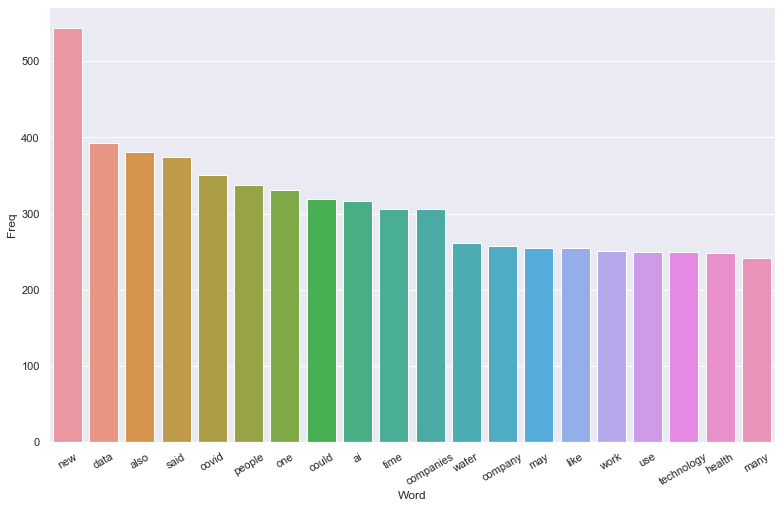

In [81]:
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [ ]:
#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

                    Bi-gram  Freq
0          machine learning    64
1               sorry polls    56
2           polls available    56
3          available moment    56
4             public health    44
5   artificial intelligence    44
6              around world    38
7                  new york    38
8           decision making    36
9                 real time    33
10            united states    33
11                last year    33
12           covid pandemic    33
13                   nb iot    32
14           mit technology    31
15                 sars cov    31
16                long term    29
17           vice president    27
18        social distancing    25
19        technology review    23


[Text(0, 0, 'machine learning'),
 Text(0, 0, 'sorry polls'),
 Text(0, 0, 'polls available'),
 Text(0, 0, 'available moment'),
 Text(0, 0, 'public health'),
 Text(0, 0, 'artificial intelligence'),
 Text(0, 0, 'around world'),
 Text(0, 0, 'new york'),
 Text(0, 0, 'decision making'),
 Text(0, 0, 'real time'),
 Text(0, 0, 'united states'),
 Text(0, 0, 'last year'),
 Text(0, 0, 'covid pandemic'),
 Text(0, 0, 'nb iot'),
 Text(0, 0, 'mit technology'),
 Text(0, 0, 'sars cov'),
 Text(0, 0, 'long term'),
 Text(0, 0, 'vice president'),
 Text(0, 0, 'social distancing'),
 Text(0, 0, 'technology review')]

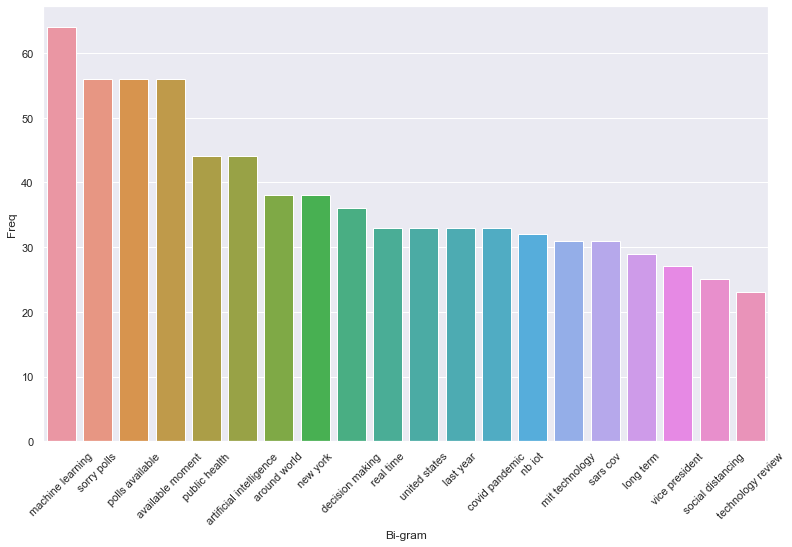

In [82]:
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)
#Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

In [ ]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

                                   Tri-gram  Freq
0                     sorry polls available    56
1                    polls available moment    56
2                     mit technology review    23
3                           plan ahead team    22
4                    updated mit technology    17
5             technology review initiatives    17
6                           zonescan nb iot    17
7                          stay updated mit    16
8                 sign algorithm artificial    15
9         algorithm artificial intelligence    15
10  artificial intelligence demystifiedalso    15
11        intelligence demystifiedalso stay    15
12             demystifiedalso stay updated    15
13                 executive vice president    15
14                       innovations th may    13
15              customer care organizations    13
16                   human challenge trials    12
17                   waterlogic created new    11
18                     created new products    11


[Text(0, 0, 'sorry polls available'),
 Text(0, 0, 'polls available moment'),
 Text(0, 0, 'mit technology review'),
 Text(0, 0, 'plan ahead team'),
 Text(0, 0, 'updated mit technology'),
 Text(0, 0, 'technology review initiatives'),
 Text(0, 0, 'zonescan nb iot'),
 Text(0, 0, 'stay updated mit'),
 Text(0, 0, 'sign algorithm artificial'),
 Text(0, 0, 'algorithm artificial intelligence'),
 Text(0, 0, 'artificial intelligence demystifiedalso'),
 Text(0, 0, 'intelligence demystifiedalso stay'),
 Text(0, 0, 'demystifiedalso stay updated'),
 Text(0, 0, 'executive vice president'),
 Text(0, 0, 'innovations th may'),
 Text(0, 0, 'customer care organizations'),
 Text(0, 0, 'human challenge trials'),
 Text(0, 0, 'waterlogic created new'),
 Text(0, 0, 'created new products'),
 Text(0, 0, 'new products focused')]

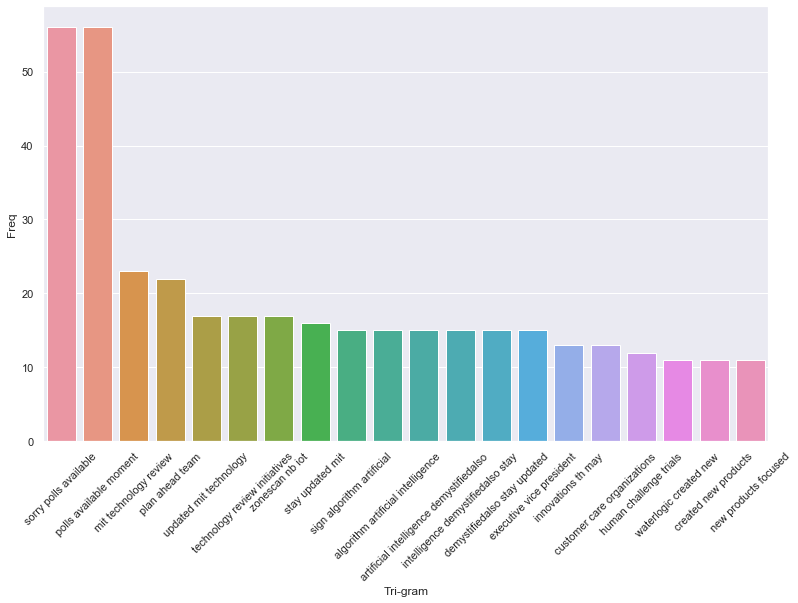

In [83]:
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)

In [92]:
#https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# get feature names
feature_names=cv.get_feature_names()

In [93]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [123]:
def extract_keys_for_row(doc, n):  
    #generate tf-idf for the given document
    tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

    #sort the tf-idf vectors by descending order of scores
    sorted_items=sort_coo(tf_idf_vector.tocoo())
    
    #extract only the top n
    keywords=extract_topn_from_vector(feature_names,sorted_items, n)
    
    kw = []
    for k in keywords:
        kw.append(k)
        
    return kw

    # now print the results
    # print("\nKeywords:")
    #for k in keywords:
    #    print(k,keywords[k])
        
extract_keys_for_row(articoli['Txt'][4], 5)

['roles', 'playing', 'vital', 'tasks', 'types']

In [124]:
articoli['Keywords'] = articoli['Txt'].apply(lambda x: extract_keys_for_row(x,5))

In [125]:
articoli.head()

ID                            Tech  \
0  c812e0a3418d624ae60df3ec9e19d184  Cobots and Human Hybridization   
1  0e2ef6bd7619374e0531d1551ab2141e  Privacy and Security by design   
2  8602d8791a1754506303dcfd9a7b79e3        Security & Cyber Warfare   
3  2157ac6d12e063b6a38c5c0491e0b322        Workforce Transformation   
4  89390733d3f9e1f30bae53de5e2d8a04       New Normal after COVID-19   

                                                                                                                                                                                                                                                                                                           Txt  \
0  pandemic drone could spot infectedspotted current climate one major problems controlling pandemic covid knowing infected widespread disease area university south australia canada based drone technology specialist draganfly inc teamed develop pandemic drone technology uses special sensors compute...   
1  census data may anonymous expectedcensus time us multiple ads running online offline media encourage everyone selected census respond constitutional goal census ensure congressional districts properly balanced thereby ensuring adequate representation modern census expanded beyond simple goal all...   
2  common pandemic scams highlighted domain name analysiscoronavirus lockdowns may slowly starting unwind attempts use pandemic scam people continues gain steamaccording analysis coronavirusrelated domain names cybersecurity firm cujoai scams fall three general categories fake products financial fr...   
3                                                                                                                                                                                               questions rapidly unfolding future smart fabricssoon clothes may able monitor vital signs analyze results warn   
4  types robots playing vital roles covidperfect storm disruptions supply demand workplace practices turned world manufacturing supply chains upside social distancing isolation order day manual tasks normally undertaken humans suddenly reach unsafe undertaking tasks without human human contact exac...   

                                           Keywords  
0    [drone, metres, coughing, detect, respiratory]  
1          [census, cookies, ad networks, ad, file]  
2          [scams, cujo, fake, information, domain]  
3  [warn, unfolding, may able, able monitor, vital]  
4             [roles, playing, vital, tasks, types]